In [28]:
# Avery Witherow (adw5nej)
# Data Science Challenge - [ADW]
# Packages used for project

# Utilizing os to provide multi-system coverage in accessing data
import os
# Utilizing pandas to read in the data and format into a dataframe
import pandas as pd
# Utilizing numpy to modify categories unwanted in array
import numpy as np
# Utilizing matplotlib to display the data on a graph to tell a story
import matplotlib.pyplot as plotter

In [29]:
# Dataset retrieved: BuzzFeedNews (2018-12-fake-news-top-50)
# Link to dataset: https://github.com/BuzzFeedNews/2018-12-fake-news-top-50/blob/master/data/top_2018.csv

# Creating the path to the chosen dataset
path = os.path.abspath("DEPENDENCIES/top_2018.csv")
data = pd.read_csv(path)

# Cleaning the data utilized in project
# Converting the strings to whole integers
data['fb_engagement'] = data['fb_engagement'].str.replace(",","").astype(float)
data['fb_engagement'] = data['fb_engagement'].astype(int)
# Stripping whitespace and emojis
data['category'] = data['category'].str.replace("❌","")
data['category'] = data['category'].str.strip()
# Moving sources to correct column (merged 'Category' and 'Source' cells in original dataset if no category)
data['source'] = data['source'].fillna(data['category'])
data['source'] = data['source'].str.replace("Crime|Politics|Medical|Music|Sports|Business", "NaN", regex=True)
# Removing authors from 'Category' after moving to correct column 'Source'
notcategories = data.loc[data['category'].str.fullmatch("Crime|Politics|Medical|Music|Sports|Business", case = True) == False]['category'].unique()
for x in notcategories:
    data['category'] = data['category'].str.replace(str(x), "NaN", regex=False)

# Columns of the raw dataframe (for reference)
list(data.columns)

['title', 'url', 'fb_engagement', 'published_date', 'category', 'source']

,num_articles
published_date,
2018-07-31,1804
2018-08-31,1493
2018-10-31,1475
2018-11-30,1362
2018-09-30,1263


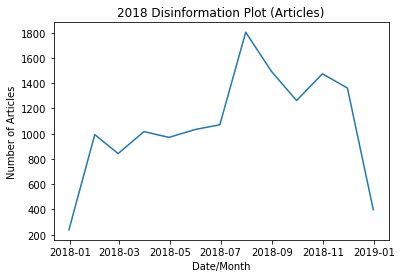

In [30]:
# Top 5 months of disinformation spreading (2018)

# Resampling the data to measure number of articles by ascending date
data['published_date'] = pd.to_datetime(data['published_date'])
df1 = data.set_index('published_date')['title'].resample('M').size()

# Plotting the data by ascending date before sorting it
plotter.title("2018 Disinformation Plot (Articles)")
plotter.xlabel("Date/Month")
plotter.ylabel("Number of Articles")
plotter.plot(df1)

# Sorting the data by descending amount of articles
final1 = df1.sort_values(ascending=False).to_frame().head(5)
final1.columns = ['num_articles']
final1.head(5)

,num_engagements
published_date,
2018-05-31,7215712
2018-04-30,5511081
2018-07-31,4835636
2018-09-30,4798592
2018-06-30,3879637


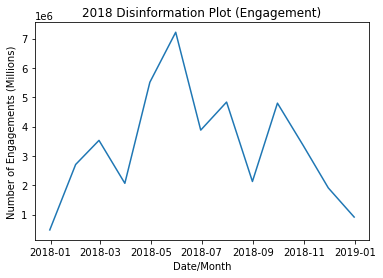

In [31]:
# Resampling the data to measure number of articles by ascending date
df2 = data.set_index('published_date')['fb_engagement'].resample('M').sum()

# Plotting the data by ascending date before sorting it
plotter.title("2018 Disinformation Plot (Engagement)")
plotter.xlabel("Date/Month")
plotter.ylabel("Number of Engagements (Millions)")
plotter.plot(df2)

# Sorting the data by descending amount of engagement
final2 = df2.sort_values(ascending=False).to_frame().head(5)
final2.columns = ['num_engagements']
final2.head(5)

In [32]:
# Top authors upon total articles
df3 = data.groupby('source').size()

# Sorting the data by descending amount of engagement
final3 = df3.sort_values(ascending=False).to_frame().head(5)
final3.columns = ['num_articles']
final3.head(5)

,num_articles
source,
Sean Adl-tabatabai,2835
Neon Nettle,1399
Niamh Harris,1284
Baxter Dmitry,1157
Pol Pinoy,654


In [33]:
# Top categories upon total articles
df4 = data.groupby('category').size()

# Sorting the data by descending amount of engagement
final4 = df4.sort_values(ascending=False).to_frame().head(5)
final4.columns = ['num_articles']
final4.head(5)

,num_articles
category,
NaN,11814
Crime,21
Politics,10
Medical,6
Business,1


In [36]:
# How many times Donald Trump was mentioned (my curiousity)
df5 = data.loc[data['title'].str.contains("Donald|Trump", case = False)==True]['title'].count()
print("Donald Trump was mentioned in " + str(df5) + " out of " + str(len(data)) + " entries.")

Donald Trump was mentioned in 1646 out of 13961 entries.
